In [1]:
from scrape import extract_players
from scrape import extract_year
from scrape import make_dists
from scrape import extract_age
from scrape import run_knn
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import re
import matplotlib.pyplot as plt
from scrape import read_targets
from scrape import clean_name
from sklearn.svm import SVR
from sklearn.preprocessing import scale
from scrape import model_2023

In [2]:
df2022 = extract_players("2022", "te", "PPR")
df2022

,Name,RECEIVING_REC,RECEIVING_TGT,RECEIVING_YDS,RECEIVING_Y/R,RECEIVING_LG,RECEIVING_20+,RECEIVING_TD,RUSHING_ATT,RUSHING_YDS,RUSHING_TD,MISC_FL,MISC_G,MISC_FPTS,MISC_FPTS/G,MISC_ROST,name
Rank,,,,,,,,,,,,,,,,,
1,Travis Kelce (KC),110,152,1338,12.2,52,29,12,2,5,0,1,17,316.3,18.6,100.0%,travis-kelce
2,T.J. Hockenson (MIN),86,129,914,10.6,81,12,6,0,0,0,1,17,215.4,12.7,99.3%,tj-hockenson
3,George Kittle (SF),60,86,765,12.8,54,20,11,0,0,0,1,15,200.5,13.4,99.0%,george-kittle
4,Mark Andrews (BAL),73,113,847,11.6,36,8,5,3,8,0,0,15,190.5,12.7,99.9%,mark-andrews
5,Evan Engram (JAC),73,98,766,10.5,36,11,4,2,13,0,0,17,176.9,10.4,94.2%,evan-engram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,James Winchester (KC),0,0,0,0.0,0,0,0,0,0,0,0,3,0.0,0.0,0.0%,james-winchester
231,Patrick Scales (CHI),0,0,0,0.0,0,0,0,0,0,0,0,5,0.0,0.0,0.0%,patrick-scales
232,Andrew DePaola (MIN),0,0,0,0.0,0,0,0,0,0,0,0,3,0.0,0.0,0.0%,andrew-depaola


In [4]:
names2022 = list(df2022["name"].head(50))
dists2022 = make_dists(names2022, "2022", "te")
dists2022.head(20)

travis-kelce
tj-hockenson
george-kittle
mark-andrews
evan-engram
tyler-higbee
pat-freiermuth
cole-kmet
taysom-hill
dalton-schultz
david-njoku
dallas-goedert
gerald-everett
dawson-knox
juwan-johnson
tyler-conklin
noah-fant
jordan-akins
zach-ertz
robert-tonyan
hayden-hurst
hunter-henry
mike-gesicki
austin-hooper
chigoziem-okonkwo
cade-otton
isaiah-likely
will-dissly
greg-dulcich
foster-moreau
darren-waller
logan-thomas
kyle-pitts
daniel-bellinger
jelani-woods
noah-gray
colby-parkinson
brock-wright
harrison-bryant
trey-mcbride
kylen-granson
cj-uzomah
irv-smith-jr
mycole-pruitt
mo-alie-cox
tommy-tremble
jonnu-smith
jake-ferguson
adam-trautman
shane-zylstra


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,travis-kelce,32,17,6.470588,1.943848,8.941176,2.363213,78.705882,29.891499,12.617647,4.351637,27.058824,11.709577,0.705882,1.125360,23.3,0
1,tj-hockenson,25,17,5.058824,2.959940,7.588235,3.565502,53.764706,40.394422,10.929412,5.629519,20.882353,18.556376,0.352941,0.680932,19.2,0
2,george-kittle,28,15,4.000000,1.712698,5.733333,2.143725,51.000000,33.093806,12.880000,5.734713,23.133333,11.723860,0.733333,0.853750,16.8,0
3,mark-andrews,26,15,4.866667,2.729265,7.533333,2.777689,56.466667,33.304387,10.600000,3.453887,18.866667,8.048740,0.333333,0.596285,23.2,1
4,evan-engram,27,17,4.294118,2.802619,5.764706,3.638510,45.058824,40.303949,10.164706,4.328421,15.764706,8.775162,0.235294,0.545507,16.4,1
5,tyler-higbee,29,16,4.500000,2.850439,6.750000,3.526684,38.750000,27.864628,7.731250,3.253982,12.937500,7.163002,0.187500,0.526634,20.3,1
6,pat-freiermuth,23,15,4.200000,2.286190,6.533333,2.753584,48.800000,25.672813,11.493333,5.835348,20.200000,12.644894,0.133333,0.339935,17.2,1
7,cole-kmet,23,17,2.941176,1.661700,4.058824,1.862023,32.000000,20.962151,10.117647,5.707398,16.823529,11.423584,0.411765,0.691020,18.3,2
8,taysom-hill,31,16,0.562500,0.609175,0.812500,0.881671,4.812500,8.669045,3.718750,5.202069,4.500000,7.599342,0.125000,0.330719,2.5,3
9,dalton-schultz,26,15,3.800000,2.256841,5.933333,2.669998,38.466667,24.722100,8.880000,4.442102,14.000000,7.702813,0.333333,0.699206,16.0,1


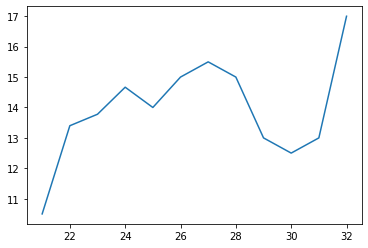

In [5]:
agepergames = dists2022[['age', 'games_played']]
df = agepergames.groupby('age')['games_played'].mean()
plt.plot(df)
plt.show()

2021 Data

In [6]:
df2021 = extract_players("2021", "te", "PPR")

In [7]:
names2021 = list(df2021["name"].head(50))
dists2021 = make_dists(names2021, "2021", "te")
dists2021.head(20)

mark-andrews
travis-kelce
dalton-schultz
george-kittle
zach-ertz
kyle-pitts
rob-gronkowski
dallas-goedert
mike-gesicki
hunter-henry
dawson-knox
noah-fant
pat-freiermuth
tyler-higbee
tj-hockenson
tyler-conklin
darren-waller
jared-cook
cj-uzomah
cole-kmet
gerald-everett
david-njoku
evan-engram
austin-hooper
foster-moreau
mo-alie-cox
jack-doyle
cameron-brate
albert-okwuegbunam
dan-arnold
anthony-firkser
durham-smythe
geoff-swaim
ricky-seals-jones
jonnu-smith
ryan-griffin
hayden-hurst
adam-trautman
harrison-bryant
josiah-deguara
kyle-rudolph
donald-parham
brevin-jordan
logan-thomas
tommy-tremble
juwan-johnson
john-bates
jimmy-graham
james-oshaughnessy
robert-tonyan


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,mark-andrews,25,17,6.294118,2.515007,9.000000,2.828427,80.058824,34.339945,12.858824,3.444016,26.117647,9.405145,0.529412,0.696009,25.2,0
1,travis-kelce,31,16,5.750000,1.920286,8.375000,2.496873,70.312500,44.641235,11.306250,3.887555,23.562500,14.794293,0.562500,0.704339,19.9,0
2,dalton-schultz,25,17,4.588235,2.170899,6.117647,2.373440,47.529412,25.186639,10.170588,3.345368,16.647059,7.153289,0.470588,0.696009,16.1,1
3,george-kittle,27,14,5.071429,3.058111,6.714286,3.692242,65.000000,51.343382,13.135714,6.613040,22.928571,11.768386,0.428571,0.622700,18.3,0
4,zach-ertz,30,17,4.352941,2.299391,6.588235,3.088095,44.882353,24.190135,10.588235,4.012463,18.588235,9.468579,0.294118,0.570315,19.0,1
5,kyle-pitts,20,17,4.000000,1.909727,6.470588,1.684450,60.352941,38.452325,14.870588,6.918667,27.470588,13.958416,0.058824,0.235294,19.2,2
6,rob-gronkowski,32,12,4.583333,2.465033,7.333333,3.009245,66.833333,40.607539,13.725000,5.469937,23.833333,9.965217,0.500000,0.866025,12.2,0
7,dallas-goedert,26,15,3.733333,1.878534,5.066667,2.048306,55.333333,32.990234,14.620000,6.897555,21.733333,10.723598,0.266667,0.573488,15.4,2
8,mike-gesicki,25,17,4.294118,2.561358,6.588235,2.590908,45.882353,29.083819,9.558824,4.439801,18.647059,10.243742,0.117647,0.322190,18.0,1
9,hunter-henry,26,16,3.125000,1.615356,4.687500,1.721872,37.687500,21.756375,12.912500,6.214487,19.062500,8.340179,0.562500,0.704339,14.0,2


2020 Data

In [8]:
df2020 = extract_players("2020", "te", "PPR")

In [9]:
names2020 = list(df2020["name"].head(50))
dists2020 = make_dists(names2020, "2020", "te")
dists2020.head(20)

travis-kelce
darren-waller
logan-thomas
robert-tonyan
tj-hockenson
mark-andrews
mike-gesicki
rob-gronkowski
noah-fant
hayden-hurst
dalton-schultz
hunter-henry
jimmy-graham
eric-ebron
evan-engram
jonnu-smith
tyler-higbee
jared-cook
george-kittle
dallas-goedert
austin-hooper
irv-smith-jr
dan-arnold
gerald-everett
jordan-akins
anthony-firkser
trey-burton
tyler-eifert
mo-alie-cox
drew-sample
zach-ertz
darren-fells
chris-herndon-iv
jordan-reed
richard-rodgers
cameron-brate
dawson-knox
jacob-hollister
kyle-rudolph
jack-doyle
cole-kmet
harrison-bryant
will-dissly
durham-smythe
james-oshaughnessy
greg-olsen
david-njoku
ross-dwelley
adam-shaheen
tyler-conklin


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,travis-kelce,30,15,7.000000,1.966384,9.666667,3.047768,94.400000,34.140494,13.673333,3.811293,26.066667,9.219303,0.733333,0.573488,23.0,0
1,darren-waller,27,16,6.687500,2.952091,9.062500,3.543811,74.750000,50.923349,10.450000,4.725595,20.750000,10.127315,0.562500,0.609175,26.3,0
2,logan-thomas,29,16,4.500000,2.958040,6.875000,3.257204,41.875000,28.462420,9.100000,3.726090,16.375000,8.252840,0.375000,0.484123,1.5,1
3,robert-tonyan,26,16,3.250000,1.750000,3.687500,1.861409,36.625000,25.556005,10.381250,4.534757,19.625000,11.688001,0.687500,0.768013,0.8,2
4,tj-hockenson,23,16,4.187500,1.628602,6.312500,2.310810,45.187500,24.764437,10.343750,3.850482,19.562500,11.352140,0.375000,0.484123,17.4,1
5,mark-andrews,24,14,4.142857,1.641304,6.285714,2.118914,50.071429,23.611330,12.921429,5.893965,20.571429,8.649643,0.500000,0.731925,4.2,2
6,mike-gesicki,24,15,3.533333,2.499778,5.666667,2.867442,46.866667,33.842511,12.700000,4.803610,23.000000,14.746751,0.400000,0.611010,15.2,2
7,rob-gronkowski,31,16,2.812500,1.810344,4.812500,2.242174,38.937500,28.325052,13.187500,8.761840,20.375000,13.864861,0.437500,0.609175,1.0,2
8,noah-fant,22,15,4.133333,1.995551,6.200000,2.879815,44.866667,20.902525,10.633333,4.231259,19.533333,9.618501,0.200000,0.400000,16.7,1
9,hayden-hurst,26,16,3.500000,1.936492,5.500000,1.837117,35.687500,24.260871,8.743750,4.284561,16.500000,10.931606,0.375000,0.484123,14.0,1


In [10]:
res = model_2023('te', 'PPR', dists2020, dists2021, dists2022)
res.head(50)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-5.530 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-3.641 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-5.029 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-3.377 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-2.951 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-5.071 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-3.531 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-4.860 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-3.232 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-2.658 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-5.067 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

,name,proj fpts,class
0,travis-kelce,13.729691,0
1,tj-hockenson,11.651535,0
2,george-kittle,11.254242,0
3,mark-andrews,10.827184,1
4,evan-engram,9.785823,1
5,dallas-goedert,9.610886,1
6,pat-freiermuth,9.228774,1
7,david-njoku,9.211049,1
8,tyler-higbee,9.143565,1
9,zach-ertz,9.109793,1
